# Intoduction to feature Engineering

*What is Feature Engineering?* 
- It is the process of transforming data to increase the predictive performance of machine learning models.
- Feature engineering is both useful and necessary for the following reasons:
    - Often better predictive accuracy
    - better interpretability of relationships in the data.


*There are two main approaches to feature engineering for most tabular datasets:*
- The checklist approach: using tried and tested methods to construct features.
- The domain-based approach: incorporating the domain knowledge of the dataset's subject matter into constructing new features.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme()
sns.set_palette(sns.color_palette("dark6"))
sns.set_style('darkgrid')


In [2]:
data = pd.read_csv("SuperMarket Analysis.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### The Checklist Approach
- **Numeric Aggregations** : is a common feature engineering approach for longitudinal or panel data - data where subjects are repeated.
- In this dataset, we have categorical data with repeated observations (supermarket Branch) 

Numeric aggregation involves 3 parameters
- categorical column 
- Numeric column(s) to be aggregated
- Aggregation type: Mean, Median, Mode, Std, variance, count etc.

In [5]:
# Numeric aggregation
data['Branch'].value_counts()

Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64

In [6]:
data['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [7]:
data['Gender'].value_counts()

Gender
Female    571
Male      429
Name: count, dtype: int64

In [8]:
grouped_branch = data.groupby('Branch')

data[['tax_branch_mean','unit_price_mean']] = grouped_branch[['Tax 5%','Unit price']].transform('mean')
data[['tax_branch_std','unit_price_std']] = grouped_branch[['Tax 5%','Unit price']].transform('std')
data[['product_count','gender_count']] = grouped_branch[['Product line','Gender']].transform('count')


In [9]:
data[['Branch', 'tax_branch_mean', 'unit_price_mean', 'tax_branch_std',
    'unit_price_std', 'product_count', 'gender_count']].head(10)

,Branch,tax_branch_mean,unit_price_mean,tax_branch_std,unit_price_std,product_count,gender_count
0,Alex,14.874001,54.780853,11.030477,26.132127,340,340
1,Giza,16.052367,56.609024,12.531470,27.179799,328,328
2,Alex,14.874001,54.780853,11.030477,26.132127,340,340
3,Alex,14.874001,54.780853,11.030477,26.132127,340,340
4,Alex,14.874001,54.780853,11.030477,26.132127,340,340
5,Giza,16.052367,56.609024,12.531470,27.179799,328,328
6,Alex,14.874001,54.780853,11.030477,26.132127,340,340
7,Giza,16.052367,56.609024,12.531470,27.179799,328,328
8,Alex,14.874001,54.780853,11.030477,26.132127,340,340
9,Cairo,15.232024,55.659277,11.545122,26.224559,332,332


*Feature engineering tries to explicitly focus the model's attention on certain features. To summarize, feature engineering is not about creating "new" information, but rather directing and/or focusing the model's attention on certain infomation, that you as the data scientist judge to be important.*

**Indicator Variables and Interaction terms**
- Indicator Variable: only take on the value 0 or 1 to indicate the absence or presence of some information.
    - For example: we define an indicator variable *unit_price_50* to indicate if the product has a unit price greater than 50. 
    - To put it into perspective, think of e-commerce store having free shpping on all orders above $50; this may be useful information in predicting customer behaviour and worth explicit definition for the model.
- Interaction terms: are created based on the presence of interaction effects between 2 or more variables. This is largely driven by domain expertise, although there are statistical tests to help determine them.

In [10]:
# indicator variable
data['unit_price_50'] =  np.where(data['Unit price']>50,1,0)

# interaction variable
data['unit_price_50*qty'] = data['unit_price_50'] * data['Quantity']

In [11]:
data[['unit_price_50','unit_price_50*qty']].head()

,unit_price_50,unit_price_50*qty
0,1,7
1,0,0
2,0,0
3,1,8
4,1,7


In [12]:
def plot_hist(data1,data2):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
    sns.histplot(data1,ax=ax1,kde=True)
    sns.histplot(data2, ax=ax2, kde=True)

**Numeric Transformation**

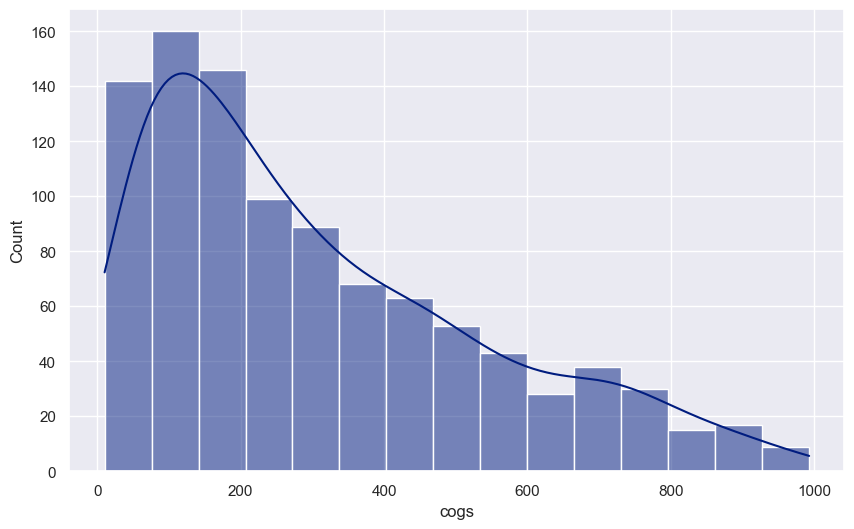

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='cogs',kde=True)
plt.show()

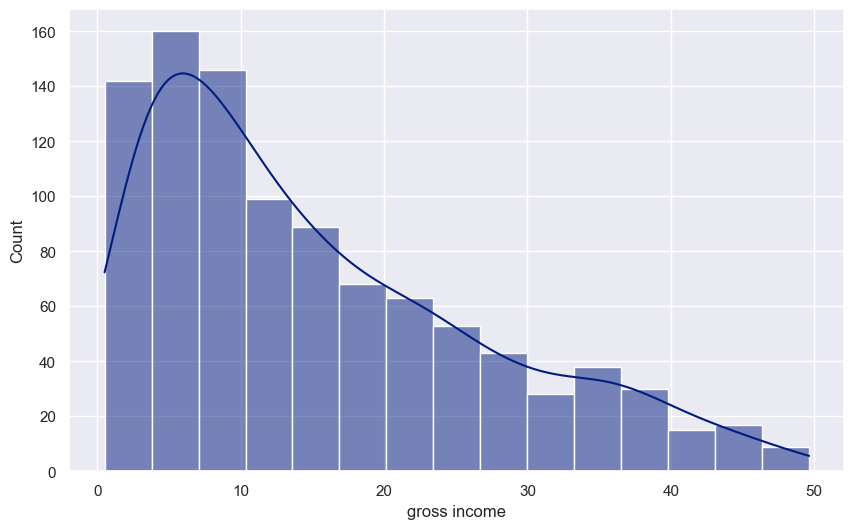

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='gross income',kde=True)
plt.show()

In [15]:
data['log cogs'] = np.log(data['cogs']+1) # cogs = Cost of Goods Sold (cogs)
# data['gross income squared'] = np.square(data['gross income'])

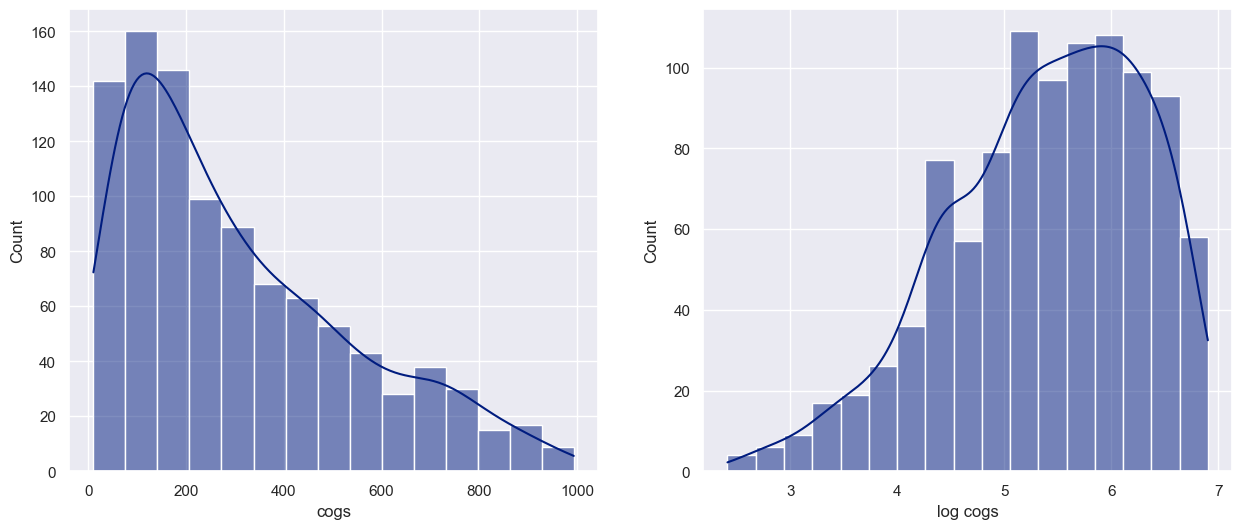

In [16]:
plot_hist(data1=data['cogs'],data2=data['log cogs'])

The log transformation made the distribution of Cost of Goods Sold(cogs) more normally distributed (or less right-skewed).
- This will models like linear regression as their weights and coefficient won't be strongly influenced by outliers that caused the initial skewness.

**Numerical Scaling**

Why do we do this?
- When predictor variables are on very different scales, models like LR, DL models may bias coefficients to variables on a larger scale. So we correct those numneric variable by normalization.

In [19]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'tax_branch_mean', 'unit_price_mean', 'tax_branch_std',
       'unit_price_std', 'product_count', 'gender_count', 'unit_price_50',
       'unit_price_50*qty', 'log cogs'],
      dtype='object')

In [20]:
data[['gross income','Rating']]

,gross income,Rating
0,26.1415,9.1
1,3.8200,9.6
2,16.2155,7.4
3,23.2880,8.4
4,30.2085,5.3
...,...,...
995,2.0175,6.2
996,48.6900,4.4
997,1.5920,7.7
998,3.2910,4.1


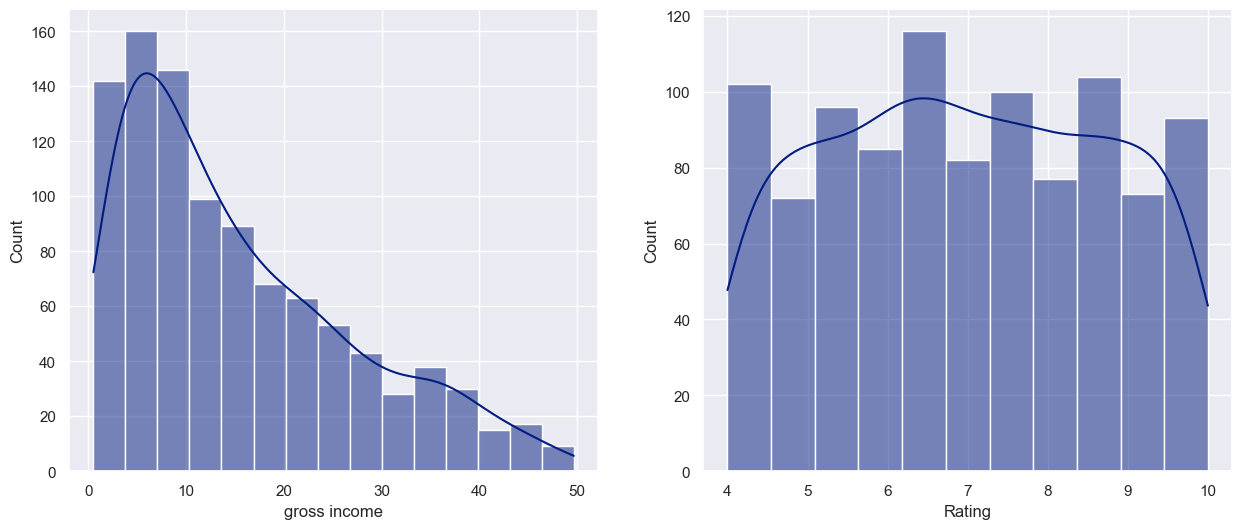

In [21]:
plot_hist(data1=data['gross income'],data2=data['Rating'])

In [22]:
data[['gross income','Rating']].describe()

,gross income,Rating
count,1000.000000,1000.00000
mean,15.379369,6.97270
std,11.708825,1.71858
min,0.508500,4.00000
25%,5.924875,5.50000
50%,12.088000,7.00000
75%,22.445250,8.50000
max,49.650000,10.00000


'gross income' and 'Ratings' are on very different scales.
- We can perform normalization to put column on a 0-1 scale.

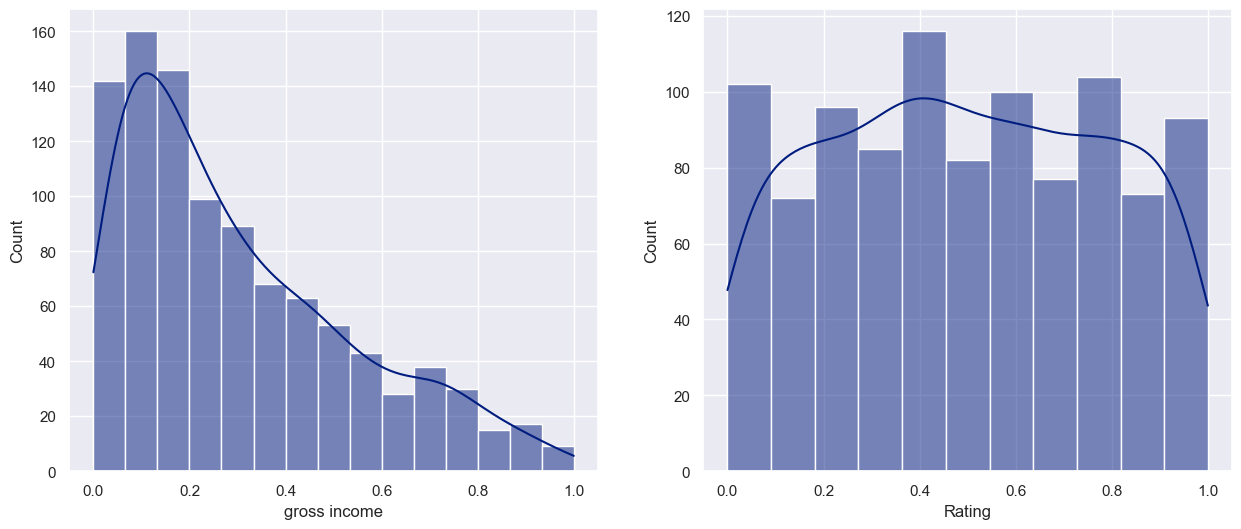

In [23]:
from sklearn.preprocessing import MinMaxScaler
data[['gross income','Rating']] = MinMaxScaler().fit_transform(data[['gross income','Rating']])
plot_hist(data1=data['gross income'],data2=data['Rating'])

**Categorical Variable Handling**

- *One-hot Encoding*
- It creates n indicator variables for a categorical column with n categories.


In [28]:
data.select_dtypes(include='object').columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')

In [31]:
data[['Gender','Payment']].value_counts()

Gender  Payment    
Female  Cash           205
        Credit card    183
        Ewallet        183
Male    Ewallet        162
        Cash           139
        Credit card    128
Name: count, dtype: int64

In [34]:
pd.get_dummies(data[['Gender','Payment']]).astype(int).head()

,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,1,0,0,0,1
1,1,0,1,0,0
2,1,0,0,1,0
3,1,0,0,0,1
4,1,0,0,0,1


**Disadvantage of Using one-hot encoding**
- If we have column with 1000 categories, one-hot encoding that one column will create 1000 new columns.
- When we have too much dimensionality, our model will take much longer time to train and find the optimal predictor weights.

- *Target Encoding*
- It does not create additional columns. 
- The idea is simple- for each unique category, the avg value of the target variable (assuming it is either continuous or binary) is calculated and that becomes the value for the respective category in the categorical column.

**For Example:*
- Let's assume we have two columns -> target = [1, 4, 5, 6] and predictor(categorical) =['a', 'b', 'a', 'b']
- Our goal is to encode the predictor variable (a categorical column) into a numeric variable that can be used by the model. To do this we simply group by the predictor to get the mean target value for each predictor category. 
- So, for predictor 'a' the encoded value will be the mean of 1 and 5 = 3 and for predictor 'b' the encoded value will be the mean of 4 and 6 = 5

In [37]:
target = np.array([1,4,5,6])
predictor  = np.array(['a','b','a','b'])

dummy = pd.DataFrame(data={
    'target':target,
    'predictor':predictor
})
print(dummy)
means = dummy.groupby('predictor')['target'].mean()
print(f'mean {means}')
dummy['predictor_encoded'] = dummy['predictor'].map(means)
print(dummy)

   target predictor
0       1         a
1       4         b
2       5         a
3       6         b
mean predictor
a    3.0
b    5.0
Name: target, dtype: float64
   target predictor  predictor_encoded
0       1         a                3.0
1       4         b                5.0
2       5         a                3.0
3       6         b                5.0


In [51]:
mean_rating_by_product_line = data.groupby('Product line')['Rating'].mean()
data['Product line target encoded'] = data['Product line'].map(mean_rating_by_product_line)
data[['Product line','Product line target encoded','Rating']]

,Product line,Product line target encoded,Rating
0,Health and beauty,0.500548,0.850000
1,Electronic accessories,0.487451,0.933333
2,Home and lifestyle,0.472917,0.566667
3,Health and beauty,0.500548,0.733333
4,Sports and travel,0.486044,0.216667
...,...,...,...
995,Health and beauty,0.500548,0.366667
996,Home and lifestyle,0.472917,0.066667
997,Food and beverages,0.518870,0.616667
998,Home and lifestyle,0.472917,0.016667


- *Label Encoding*
- Assings each unique category a number.
- Best for: ordinal data (where order matters)
- Encoding happens in lexicographical order.

In [56]:
from sklearn.preprocessing import LabelEncoder
data['Payment encoded'] = LabelEncoder().fit_transform(data['Payment'])
data[['Payment','Payment encoded']]

,Payment,Payment encoded
0,Ewallet,2
1,Cash,0
2,Credit card,1
3,Ewallet,2
4,Ewallet,2
...,...,...
995,Ewallet,2
996,Ewallet,2
997,Cash,0
998,Cash,0


**Date-time Decomposition**

In [57]:
data['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [58]:
# convert to  datetime object
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [60]:
# Decomposition - Extracting Year, Month and Day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data[['Date','Year','Month','Day']]



,Date,Year,Month,Day
0,2019-01-05,2019,1,5
1,2019-03-08,2019,3,8
2,2019-03-03,2019,3,3
3,2019-01-27,2019,1,27
4,2019-02-08,2019,2,8
...,...,...,...,...
995,2019-01-29,2019,1,29
996,2019-03-02,2019,3,2
997,2019-02-09,2019,2,9
998,2019-02-22,2019,2,22
